## Calculate Net Liquidity from FRED
* Downloads most recent series as of the day you're running it
* Data refresh is as EOD Wednesday

In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib notebook

In [10]:
todays_date = str(datetime.today()).split()[0]
series_begin = "2002-12-18"
series_end = todays_date

# WALCL - Total Assets
# In millions
# Updated Daily

file = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line\
&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&\
txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&\
show_axis_titles=yes&show_tooltip=yes&id=WALCL&scale=left&cosd="+series_begin+"&\
coed="+series_end+"&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&\
mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Weekly%2C%20As%20of%20Wednesday&fam=avg&\
fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date="+series_end+"&\
revision_date="+series_end+"&nd="+series_begin

all_data = pd.read_csv(file, index_col=0, parse_dates=True)

# WTRGEN - Liabilities & Capital
# In billions
# Updated Weekly ending Wednesday

file = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line\
&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=\
on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&\
show_axis_titles=yes&show_tooltip=yes&id=WTREGEN&scale=left&cosd=1986-01-08&\
coed="+series_end+"&line_color=%234572a7&link_values=false&line_style=solid&mark_type\
=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Weekly%2C%20Ending%20Wednesday&\
fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&\
vintage_date="+series_end+"&revision_date="+series_end+"&nd=1986-01-08"

all_data['WTREGEN'] = pd.read_csv(file, index_col=0, parse_dates=True)


# RRPONTSYD - Overnight Reverse Repurchase Agreements
# In billions
# Updated Weekly ending Wednesday

file = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=\
line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=\
on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&\
show_axis_titles=yes&show_tooltip=yes&id=RRPONTSYD&scale=left&cosd=2003-02-07&\
coed="+series_end+"&line_color=%234572a7&link_values=false&line_style=solid&mark_type\
=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Daily&fam=avg&fgst=lin&\
fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date="+series_end+"&\
revision_date="+series_end+"&nd=2003-02-07"

all_data['RRPONTSYD'] = pd.read_csv(file, index_col=0, parse_dates=True)
# force all of these to be numeric
all_data['RRPONTSYD'] = pd.to_numeric(all_data['RRPONTSYD'],errors='coerce')


# Formula: 
#(Assets: Total Assets: Total Assets (Less Eliminations from Consolidation): Wednesday Level
#    - Liabilities and Capital: Liabilities: Deposits with F.R. Banks, Other Than Reserve Balances: U.S. Treasury, General Account: Week Average*1000
#    - Overnight Reverse Repurchase Agreements: Treasury Securities Sold by the Federal Reserve in the Temporary Open Market Operations*1000)
# /(1000*1000)

all_data['Net Liquidity'] = (all_data['WALCL'] - (all_data['WTREGEN']*1000) - (all_data['RRPONTSYD']*1000)) / (1000)

all_data.to_csv("net_liquidity-"+str(todays_date)+".csv")

all_data.head()

,WALCL,WTREGEN,RRPONTSYD,Net Liquidity
DATE,,,,
2002-12-18,719542.0,5.959,NaN,NaN
2002-12-25,732059.0,4.678,NaN,NaN
2003-01-01,730994.0,5.016,NaN,NaN
2003-01-08,723762.0,4.829,NaN,NaN
2003-01-15,720074.0,5.244,NaN,NaN


<IPython.core.display.Javascript object>


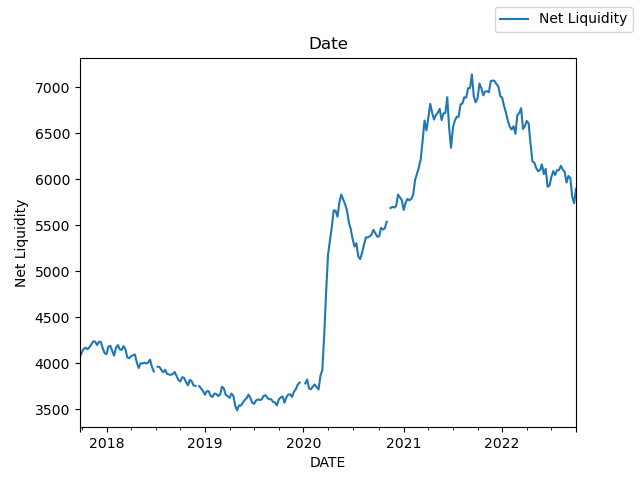

Text(0, 0.5, 'Net Liquidity')

In [12]:
all_data['Net Liquidity'].loc['2017-09-27':].plot()
plt.figlegend()
plt.title("Date")
plt.ylabel("Net Liquidity")